# Working with Pandas DataFrames

In [119]:
import numpy as np
import pandas as pd

## Creating DataFrames

Can be created from:
- Dict of 1D ndarrays, lists, tuples, dicts, or Series
- List of dicts
- 2-D ndarray
- [Structured or record](https://numpy.org/doc/stable/user/basics.rec.html) ndarray
- A Series
- Another DataFrame
- CSV, Excel, SQL or JSON file
- A list of namedtuples
- A list of dataclasses (v1.1.0+)

In [120]:
dict_of_lists = {"A": [1.0, 2.0, 3.0, 4.0], "B": [4.0, 3.0, 2.0, 1.0]}
pd.DataFrame(dict_of_lists)

,A,B
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [121]:
dict_of_dicts = {"C": {100: 1, 101: 2, 102: 3}, "D": {100: 'abc', 101: 'def', 102: 'ghi'}}
pd.DataFrame(dict_of_dicts)

,C,D
100,1,abc
101,2,def
102,3,ghi


In [122]:
df = pd.read_csv('languages.csv')  # Subset of data from the 2022 Stack Overflow Developer Survey
df

,Name,Percent used
0,JavaScript,65.36
1,HTML/CSS,55.08
2,SQL,49.43
3,Python,48.07


## Index and columns

In [123]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [124]:
df.columns

Index(['Name', 'Percent used'], dtype='object')

In [125]:
df.index += 100  # Update index
df

,Name,Percent used
100,JavaScript,65.36
101,HTML/CSS,55.08
102,SQL,49.43
103,Python,48.07


## Working with columns

A `DataFrame` is like a `dict` that contains `Series` objects with the same index.

We can can get, set and delete columns as if they were in a `dict`.

In [126]:
df['Name']  # Getting a column

100    JavaScript
101      HTML/CSS
102           SQL
103        Python
Name: Name, dtype: object

For column names that are valid Python variables names, you can access them like attributes

In [127]:
df.Name  # Get column as attribute

100    JavaScript
101      HTML/CSS
102           SQL
103        Python
Name: Name, dtype: object

In [128]:
df['Percent not used'] = 100 - df['Percent used']  # Add a new column
df

,Name,Percent used,Percent not used
100,JavaScript,65.36,34.64
101,HTML/CSS,55.08,44.92
102,SQL,49.43,50.57
103,Python,48.07,51.93


## Getting rows

Returns a `Series`

In [129]:
df.loc[100]  # By label

Name                JavaScript
Percent used             65.36
Percent not used         34.64
Name: 100, dtype: object

In [130]:
df.iloc[2]  # By position

Name                  SQL
Percent used        49.43
Percent not used    50.57
Name: 102, dtype: object

## Getting data (indexing)

Returns data in a cell

In [131]:
df.loc[102, 'Name']  # By label

'SQL'

In [132]:
df.iloc[3, 2]  # By position

np.float64(51.93)

## Slicing

Returns a `DataFrame`

In [133]:
df.iloc[:3, :2]

,Name,Percent used
100,JavaScript,65.36
101,HTML/CSS,55.08
102,SQL,49.43


In [134]:
df.iloc[:, [0]]  # Note: without [0] in brackets, it would return a Series

,Name
100,JavaScript
101,HTML/CSS
102,SQL
103,Python


In [135]:
df.loc[101:102]  # Note: with loc, end is inclusive

,Name,Percent used,Percent not used
101,HTML/CSS,55.08,44.92
102,SQL,49.43,50.57


In [136]:
df.loc[[101, 103]]

,Name,Percent used,Percent not used
101,HTML/CSS,55.08,44.92
103,Python,48.07,51.93


In [137]:
df.loc[:, ['Name', 'Percent not used']]

,Name,Percent not used
100,JavaScript,34.64
101,HTML/CSS,44.92
102,SQL,50.57
103,Python,51.93


### Boolean indexing

In [138]:
df['Percent used'] > 50

100     True
101     True
102    False
103    False
Name: Percent used, dtype: bool

In [139]:
df[df['Percent used'] > 50]

,Name,Percent used,Percent not used
100,JavaScript,65.36,34.64
101,HTML/CSS,55.08,44.92


In [140]:
df.iloc[1, 1] = np.nan
df

,Name,Percent used,Percent not used
100,JavaScript,65.36,34.64
101,HTML/CSS,NaN,44.92
102,SQL,49.43,50.57
103,Python,48.07,51.93


In [141]:
df = df.fillna({'Percent used': 90})
df

,Name,Percent used,Percent not used
100,JavaScript,65.36,34.64
101,HTML/CSS,90.00,44.92
102,SQL,49.43,50.57
103,Python,48.07,51.93


## Plotting

### Example 1 - simple bar chart

Let's create a bar chart mapping Percent used (y) to Name (x)

#### Create a custom view of the data

Index is x-axis and column is y-axis.

In [142]:
df2 = df.iloc[:, :2]
df2

,Name,Percent used
100,JavaScript,65.36
101,HTML/CSS,90.00
102,SQL,49.43
103,Python,48.07


In [143]:
df2.index = df2.pop('Name')
df2

,Percent used
Name,
JavaScript,65.36
HTML/CSS,90.00
SQL,49.43
Python,48.07


#### Specify the kind of plot (bar) and customize the x and y axis if necessary

<Axes: xlabel='Name'>

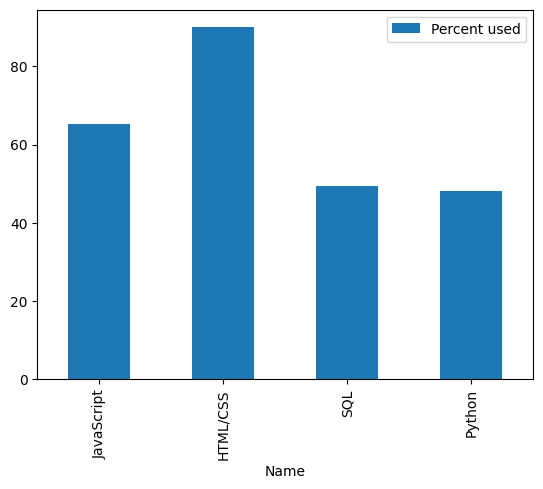

In [144]:
df2.plot.bar()

### Example 2: Plotting over years

#### Update the dataframe to track percent used over multiple years

In [145]:
df3 = df2.rename(columns={'Percent used': '2022'})
df3

,2022
Name,
JavaScript,65.36
HTML/CSS,90.00
SQL,49.43
Python,48.07


#### Add more years of data

Randomly update the percent used from the previous year by +-5

In [146]:
from random import uniform

for year in range(2021, 2017,  -1):
    df3[str(year)] = df3[str(year+1)] + [round(uniform(-5, 5), 2) for i in range(4)]
df3

,2022,2021,2020,2019,2018
Name,,,,,
JavaScript,65.36,66.38,68.53,70.53,69.99
HTML/CSS,90.00,87.66,84.25,81.61,85.71
SQL,49.43,51.97,55.85,53.69,49.37
Python,48.07,52.70,51.48,54.21,56.79


In [147]:
df3 = df3.sort_index(axis='columns')
df3

,2018,2019,2020,2021,2022
Name,,,,,
JavaScript,69.99,70.53,68.53,66.38,65.36
HTML/CSS,85.71,81.61,84.25,87.66,90.00
SQL,49.37,53.69,55.85,51.97,49.43
Python,56.79,54.21,51.48,52.70,48.07


<Axes: xlabel='Name'>

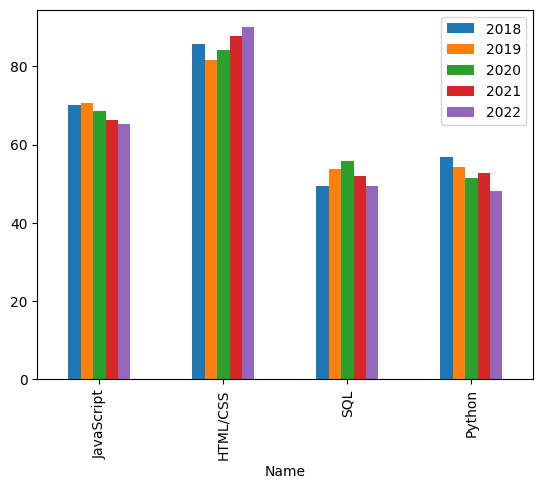

In [148]:
df3.plot.bar()

In [149]:
df4 = df3.T
df4

Name,JavaScript,HTML/CSS,SQL,Python
2018,69.99,85.71,49.37,56.79
2019,70.53,81.61,53.69,54.21
2020,68.53,84.25,55.85,51.48
2021,66.38,87.66,51.97,52.70
2022,65.36,90.00,49.43,48.07


<Axes: >

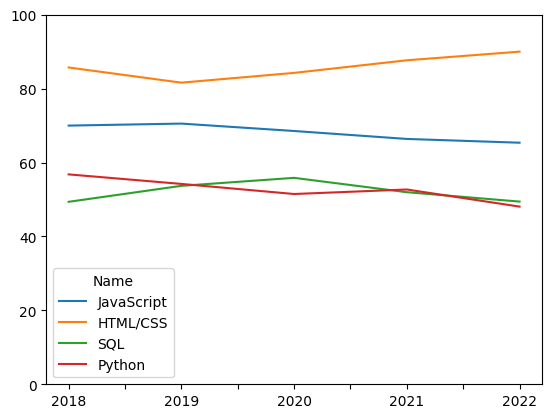

In [150]:
df4.plot(ylim=(0, 100))